In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy
import math 
import os 
import cmath 
import skimage
from skimage import measure, io 
from PIL import Image
from math import sqrt
from numpy import sin, cos, sinh, cosh,arcsin,arccos, pi, exp, abs, max,min, sinh, cosh
from scipy.spatial import Voronoi, voronoi_plot_2d, distance
from scipy.interpolate import interp1d

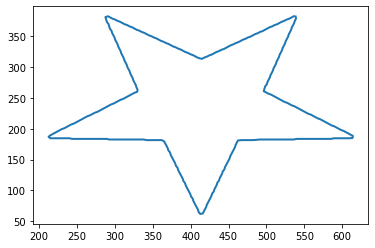

In [2]:
# Shapes imported from external files 

# resolution of contour 
def subselect(con_lst, times):
    indx = np.arange(0,con_lst.shape[0],times)
    con_lst= con_lst[indx,:]  
    return con_lst
    
    
filename = os.path.join(skimage.data_dir,'C:\\Users\\AdminSi\\Desktop\\CAGD\\Pictures_videos\\ShapeAnaysis-random3.png')
camera = io.imread(filename)

contours = measure.find_contours(camera[:,:,1], 100)
countour2 =  subselect(contours[0],5) 

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.plot(countour2[:, 1], countour2[:, 0], linewidth=2)

pts = np.array(countour2)

# impose the same number of points on the contour 


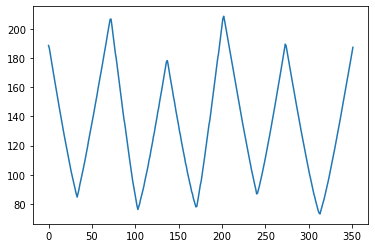

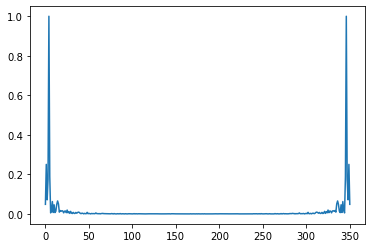

In [5]:
#pts2 =pts[:-1, :]
pts2 =pts
sum_coordinaes = 0 
area = 0 
x_g = 0 
y_g = 0

for i in range(pts2.shape[0]-1):
    area += (pts2[i,0]*pts2[i+1,1] - pts2[i+1,0]*pts2[i,1])
    x_g += (pts2[i,0]+pts2[i+1,0])*(pts2[i,0]*pts2[i+1,1] - pts2[i+1,0]*pts2[i,1])
    y_g += (pts2[i,1]+pts2[i+1,1])*(pts2[i,0]*pts2[i+1,1] - pts2[i+1,0]*pts2[i,1])
    
x_g = x_g/(3*area)
y_g = y_g/(3*area)

r_dist = ( (pts2[:,0] - x_g)**2 + (pts2[:,1] - y_g)**2)**0.5
plt.plot(r_dist)
plt.show()
# Fourier Transform
coeff = np.fft.fft(r_dist)/r_dist.shape[0]
nlist = np.arange(0,r_dist.shape[0])

coeff = abs(coeff[1:])
coeff = coeff/max(coeff)
 
plt.plot(coeff)

In [27]:
# interpolation 
# to do in order to start PCA and the distance 
x_axis = np.arange(0,coeff.shape[0])
f = interp1d(x_axis,coeff,kind="linear")

x_coords = np.arange(min(x_axis),max(x_axis)+1)
f_i = f(0.0057*coeff.shape[0])


print(f_i)
''' 
fig = plt.imshow(f_i,
           extent=[min(x),max(x),min(y),max(y)],
           origin="lower", interpolation='bicubic', cmap=cm.coolwarm)
'''

0.07147133245394151


' \nfig = plt.imshow(f_i,\n           extent=[min(x),max(x),min(y),max(y)],\n           origin="lower", interpolation=\'bicubic\', cmap=cm.coolwarm)\n'

In [18]:
print(coeff)

[4.85455234e-02 2.50677139e-01 7.13992539e-02 1.74368569e-01
 1.00000000e+00 1.89372713e-01 5.23708882e-03 1.94508803e-02
 6.26113296e-02 7.29432500e-03 4.62500928e-02 6.86786845e-03
 1.41492398e-02 4.76788974e-02 6.56602995e-02 5.08150743e-02
 9.12822893e-03 1.72239718e-02 1.33041638e-02 1.65142924e-02
 1.45194657e-02 5.56692858e-03 1.39871336e-02 1.46917163e-02
 6.43975205e-03 1.95653757e-02 5.74162418e-03 1.15951552e-02
 2.86649768e-03 1.29179677e-02 3.83671072e-03 2.23335405e-03
 7.86407141e-03 3.03863996e-03 2.39002524e-03 7.48004931e-03
 3.64251647e-03 7.21902192e-03 9.24793048e-03 7.50416442e-03
 3.14575372e-03 1.40993915e-03 3.85367765e-03 3.02033188e-03
 4.01823684e-04 2.89988682e-03 1.35618569e-03 1.23231038e-03
 8.05407580e-03 1.13950023e-03 2.57040031e-03 1.76679184e-03
 2.61485429e-04 2.28317335e-03 1.51436910e-03 1.76142504e-03
 1.25017612e-03 1.29142939e-03 4.97247207e-03 1.81919958e-03
 1.46310448e-03 1.15213677e-03 1.68801202e-03 4.06307146e-04
 1.94037494e-03 1.981857